# Loan Application Status Prediction Project

In [1]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [2]:
#lets load dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
#lets check the type of dataset
type(df)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [5]:
#print columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#checking rows and columns
df.shape

(614, 13)

In [7]:
#checking datatype of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#  check null values and summing up columns wise
print('Total null values= ',df.isnull().sum().sum())
df.isnull().sum()

Total null values=  149


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


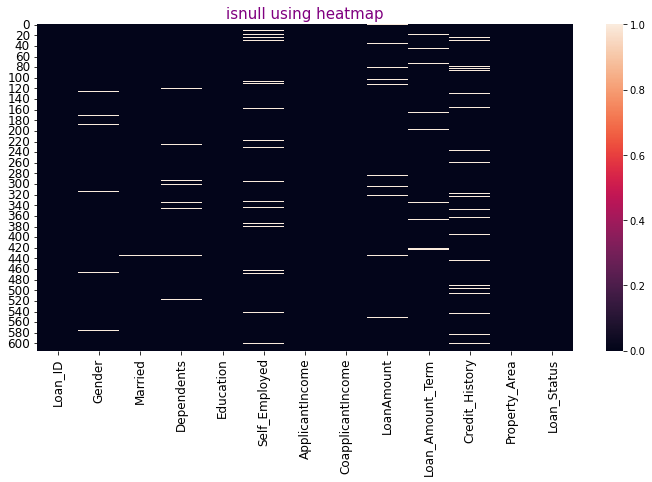

In [10]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:

from the above outcomes
   * Dataset has 614 row and 13 columns
   * There are null values present in the columns ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
   * In the heat map the lines shows null values in the columns
   * Dataset contains float64,int64 and object datatypes.

In [11]:
#dropping null values
df=df.dropna()

In [12]:
print(df.isnull().sum().sum())
df.isnull().sum()

0


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

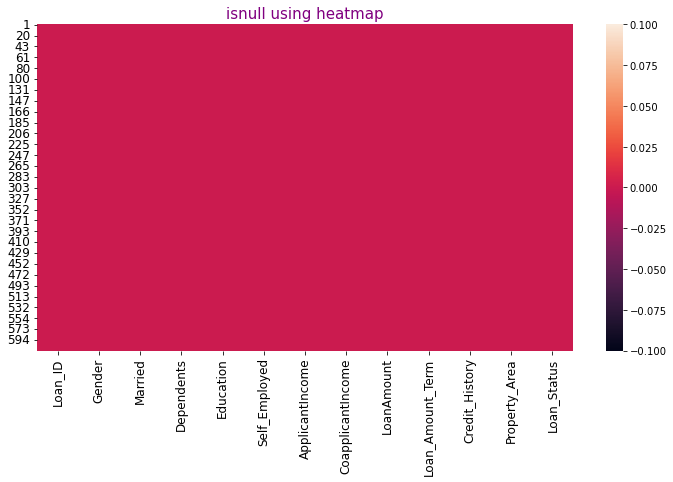

In [13]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations

* The null have been completely removed
* Now there are no line which shows null
* The heatmap is clean and of one color

In [14]:
# label encoding
df['Loan_Status']=df['Loan_Status'].replace('N',0).replace('Y',1)

In [15]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
184,LP001639,Female,Yes,0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,1
123,LP001432,Male,Yes,2,Graduate,No,2957,0.0,81.0,360.0,1.0,Semiurban,1
370,LP002194,Female,No,0,Graduate,Yes,15759,0.0,55.0,360.0,1.0,Semiurban,1


# Visualization

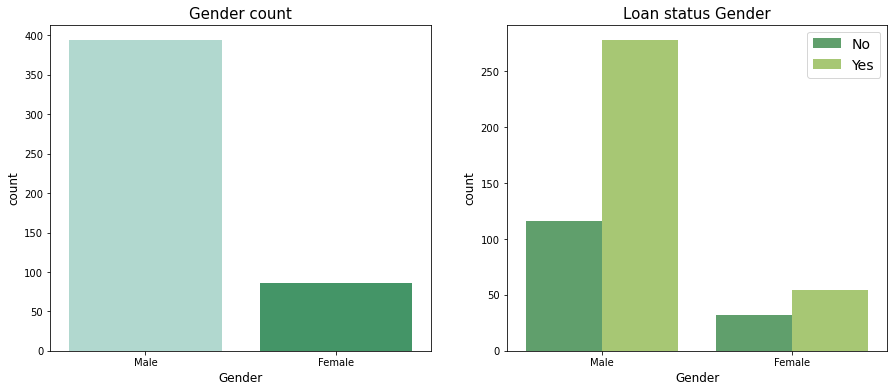

Male      394
Female     86
Name: Gender, dtype: int64

         Loan_Status
Gender             
Female           54
Male            278


In [16]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Gender'], palette='BuGn')
plt.title('Gender count', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue= df['Loan_Status'],palette='summer')
plt.title('Loan status Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Gender'].value_counts())

print('\n',df_copy.groupby(['Gender']).sum())

### Observations

* In dataset we have 394 of males and 86 records of females who applied for loan.
* For males, 278 applications got approval for loan and the rest did not got loan
* For females from 86 applications 54 got loan approval.

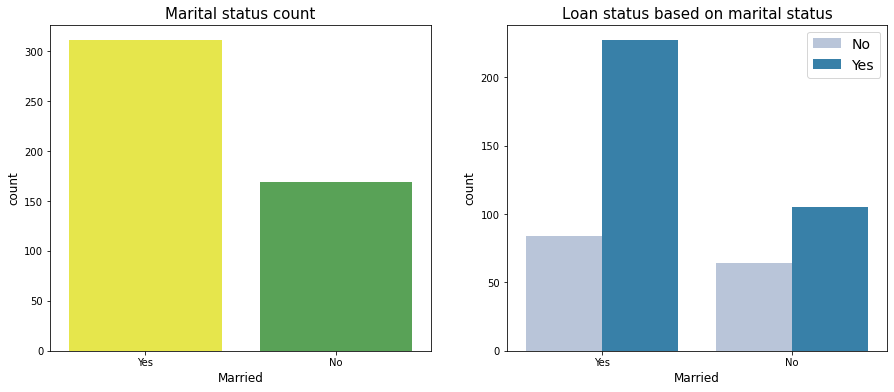

Yes    311
No     169
Name: Married, dtype: int64


,Loan_Status
Married,
No,105
Yes,227


In [17]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Married'], palette='Set1_r')
plt.title('Marital status count', fontsize=15)
plt.xlabel('Married', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['Married'], hue= df['Loan_Status'],palette='PuBu')
plt.title('Loan status based on marital status', fontsize=15)
plt.xlabel('Married', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Married'].value_counts()),
df_copy.groupby(['Married']).sum()

### Observations

* More number of Married people have applied for the loan(331) and umarried people's applications are 169.
* Among 331 married people's applications 227 applications got approval for loan and rest didn't got loan
* Among 169 unmarried people 105 appliation got approval for loan and rest o the application got rejected.

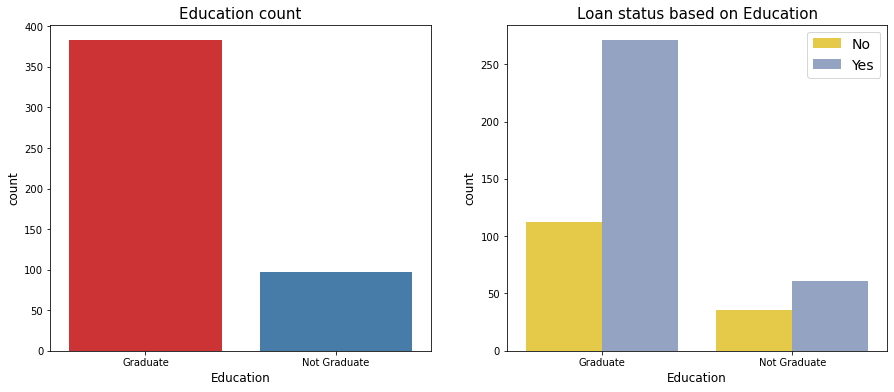

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


,Loan_Status
Education,
Graduate,271
Not Graduate,61


In [18]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Education'], palette='Set1')
plt.title('Education count', fontsize=15)
plt.xlabel('Education', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['Education'], hue= df['Loan_Status'],palette='Set2_r')
plt.title('Loan status based on Education', fontsize=15)
plt.xlabel('Education', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Education'].value_counts()),
df_copy.groupby(['Education']).sum()

### Observations

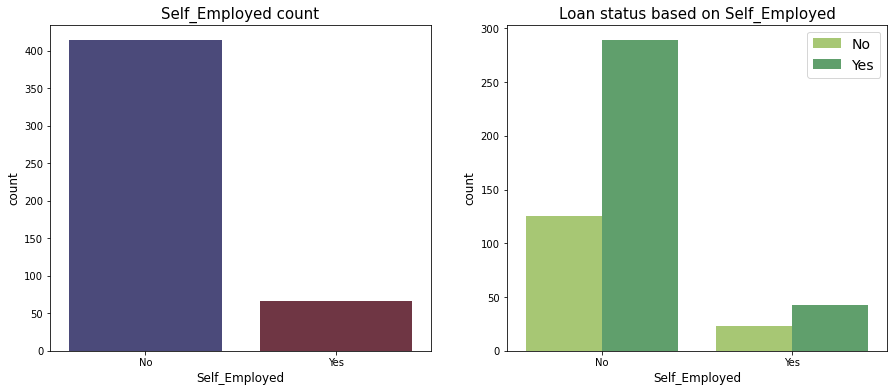

No     414
Yes     66
Name: Self_Employed, dtype: int64


,Loan_Status
Self_Employed,
No,289
Yes,43


In [19]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Self_Employed'], palette='icefire')
plt.title('Self_Employed count', fontsize=15)
plt.xlabel('Self_Employed', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['Self_Employed'], hue= df['Loan_Status'],palette='summer_r')
plt.title('Loan status based on Self_Employed', fontsize=15)
plt.xlabel('Self_Employed', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Self_Employed'].value_counts()),
df_copy.groupby(['Self_Employed']).sum()

### Observations

* We have 414 records of people who are not self employed and only 66 records of people who are self employed in the dataset.
* among 66 people who are self employed 43 people got loan and rest didn't got the loan
* among 414 people who are not self employed 289 got loan and the rest didn't.

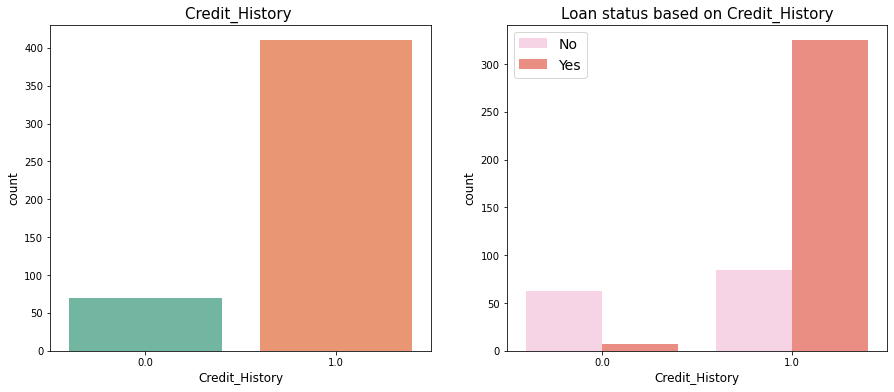

1.0    410
0.0     70
Name: Credit_History, dtype: int64


,Loan_Status
Credit_History,
0.0,7
1.0,325


In [20]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Credit_History'], palette='Set2')
plt.title('Credit_History ', fontsize=15)
plt.xlabel('Credit_History', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['Credit_History'], hue= df['Loan_Status'],palette='Set3_r')
plt.title('Loan status based on Credit_History', fontsize=15)
plt.xlabel('Credit_History', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Credit_History'].value_counts()),
df_copy.groupby(['Credit_History']).sum()

### Observations

* People with credit history 1 are 410 and people with 0.0 creidt history are 70
* Among 70 people with 0 credit history got loan approval for 7 applications only
* But people with 1 credit history got 325 application approoved.

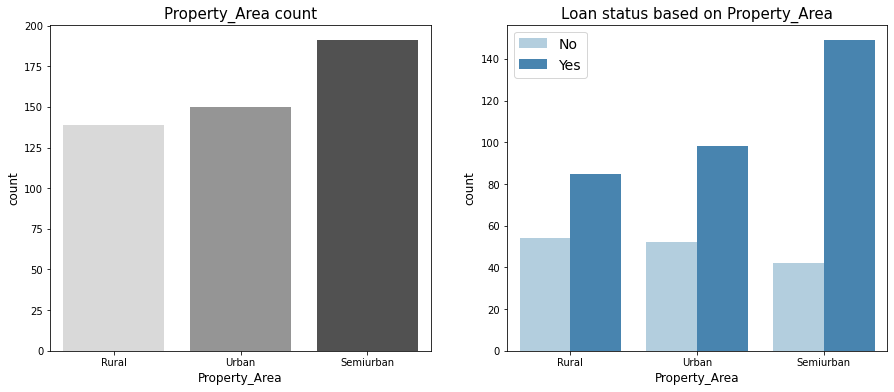

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


,Loan_Status
Property_Area,
Rural,85
Semiurban,149
Urban,98


In [21]:
df_copy=df.copy()
df_copy.drop(['Loan_ID','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'],axis=1,inplace=True)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Property_Area'], palette='Greys')
plt.title('Property_Area count', fontsize=15)
plt.xlabel('Property_Area', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(df['Property_Area'], hue= df['Loan_Status'],palette='Blues')
plt.title('Loan status based on Property_Area', fontsize=15)
plt.xlabel('Property_Area', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(labels=['No','Yes'],fontsize=14)

plt.show()

print(df['Property_Area'].value_counts()),
df_copy.groupby(['Property_Area']).sum()

### Observations

* Applicationa are from  3 different Property area.
* people with rural property area have high chance of getting loan approval.

# Describing Dataset

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,480,480,LP001003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,480,2,Male,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,480,2,Yes,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,480,4,0,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,480,2,Graduate,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,480,2,No,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,480.0,NaN,NaN,NaN,5364.23125,5668.251251,150.0,2898.75,3859.0,5852.5,81000.0
CoapplicantIncome,480.0,NaN,NaN,NaN,1581.093583,2617.692267,0.0,0.0,1084.5,2253.25,33837.0
LoanAmount,480.0,NaN,NaN,NaN,144.735417,80.508164,9.0,100.0,128.0,170.0,600.0
Loan_Amount_Term,480.0,NaN,NaN,NaN,342.05,65.212401,36.0,360.0,360.0,360.0,480.0


### Observations

* People with income 150 to 81000 are applying for loan
* Loan amount is between 100 to 600

# correlation

In [23]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


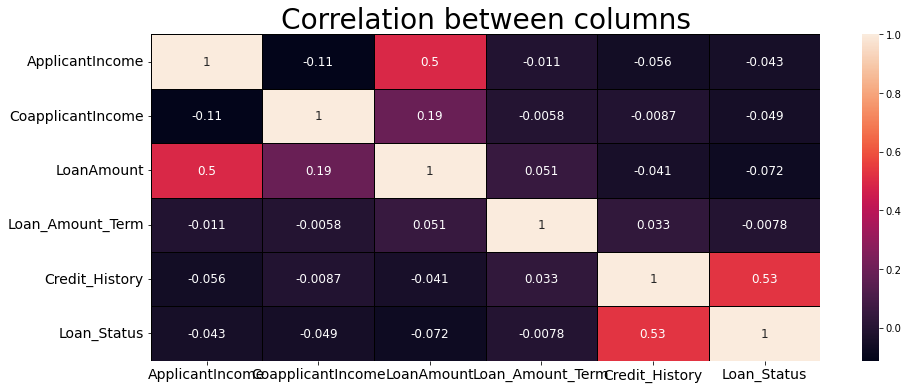

In [24]:
#df.corr() using heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),linewidth='0.5',linecolor='black',annot=True, annot_kws={'size': 12})
plt.title('Correlation between columns', size=28)
plt.xticks(size=14)
plt.yticks(size=14,rotation=360)
plt.show()

### Observations

* All the columsn except credict history are negatively correlated with loan status column.
* credit history shows 53 percent positive correlation with loan status column

# checking outliers

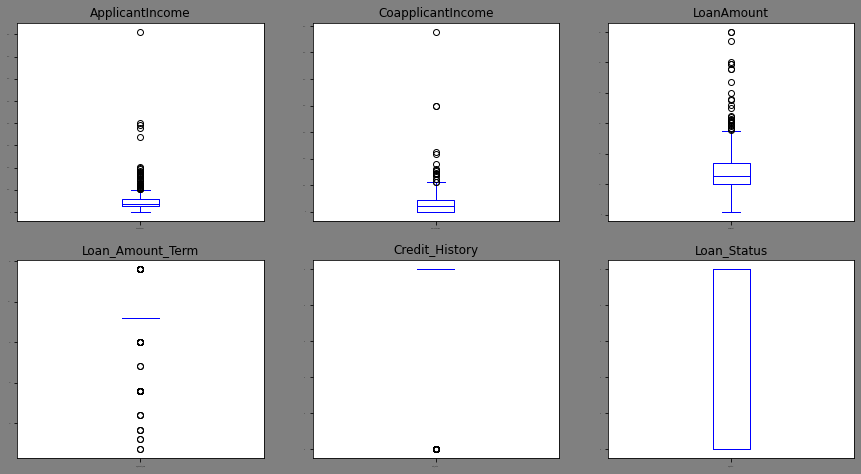

In [25]:
list_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']
plt.rcParams['figure.facecolor']='grey'
df.plot(kind='box',title=list_col, subplots=True, layout=(2,3), legend= True, fontsize=1, figsize=(15,8), color='blue')
plt.show()

### Observations

* There might be skewness in all the columsn except loan status 

# Skewness

In [26]:
df.skew()

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
dtype: float64

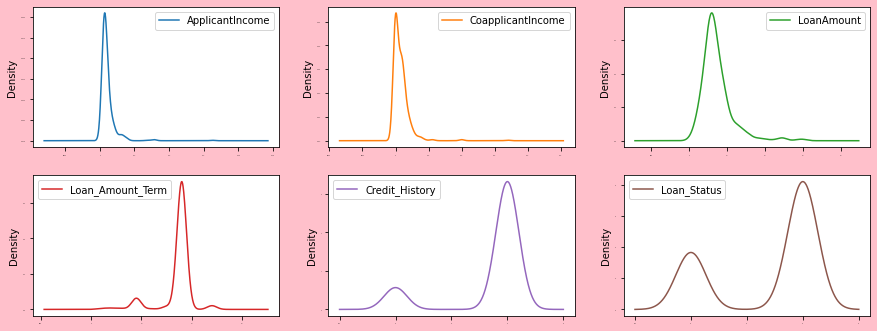

In [27]:
#vizualizing skewness
plt.rcParams['figure.facecolor']='pink'
df.plot(kind='kde', subplots=True, layout=(5,3), sharex= False, legend= True, fontsize=1, figsize=(15,15))
plt.show()

### Observations

* All the columns have skewness

# Findings(insights)

* Males who are married and graduate are having high chance for loan approval
* people who have property in rural area can et loan easily than people having property area in semi-rural and urban areas.
* To get a loan applicants must have credit history of 1

# Data Preprocessing

# Label Encoding

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [29]:
df1=df.copy()
df1.drop('Loan_ID',axis=1,inplace=True)

In [30]:
# converting string into integer
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df1['Gender'])
#transforming data
df1['Gender']=le.transform(df1['Gender'])

le.fit(df1['Married'])
df1['Married']=le.transform(df1['Married'])

le.fit(df1['Education'])
df1['Education']=le.transform(df1['Education'])

le.fit(df1['Self_Employed'])
df1['Self_Employed']=le.transform(df1['Self_Employed'])

le.fit(df1['Property_Area'])
df1['Property_Area']=le.transform(df1['Property_Area'])

le.fit(df1['Loan_Status'])
df1['Loan_Status']=le.transform(df1['Loan_Status'])

le.fit(df1['Dependents'])
df1['Dependents']=le.transform(df1['Dependents'])

In [31]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Removing outliers

using Zscore technique

In [32]:
from scipy.stats import zscore

In [33]:
z =np.abs(zscore(df1['ApplicantIncome']))
print(len(np.where(z<3)))
dn=df1[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

1
Shape of New Dataframe dn: (475, 12)


In [34]:
z =np.abs(zscore(dn['CoapplicantIncome']))
print(z)
print(len(np.where(z<3)))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

1      0.030426
2      0.605857
3      0.293921
4      0.605857
5      0.995275
         ...   
609    0.605857
610    0.605857
611    0.514277
612    0.605857
613    0.605857
Name: CoapplicantIncome, Length: 475, dtype: float64
1
Shape of New Dataframe dn1: (470, 12)


In [35]:
z =np.abs(zscore(dn1['LoanAmount']))
print(z)
print(len(np.where(z<3)))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)

1      0.185267
2      1.010123
3      0.291700
4      0.012313
5      1.664007
         ...   
609    0.943602
610    1.356030
611    1.477749
612    0.599676
613    0.118746
Name: LoanAmount, Length: 470, dtype: float64
1
Shape of New Dataframe dn2: (460, 12)


In [36]:
z =np.abs(zscore(dn2['Loan_Amount_Term']))
print(z)
print(len(np.where(z<3)))
dn3=dn2[(z<3)]
print('Shape of New Dataframe dn3:',dn3.shape)

1      0.275930
2      0.275930
3      0.275930
4      0.275930
5      0.275930
         ...   
609    0.275930
610    2.451748
611    0.275930
612    0.275930
613    0.275930
Name: Loan_Amount_Term, Length: 460, dtype: float64
1
Shape of New Dataframe dn3: (450, 12)


In [37]:
z =np.abs(zscore(dn3['Credit_History']))
print(z)
print(len(np.where(z<3)))
dn4=dn3[(z<3)]
print('Shape of New Dataframe dn4:',dn4.shape)

1      0.414578
2      0.414578
3      0.414578
4      0.414578
5      0.414578
         ...   
609    0.414578
610    0.414578
611    0.414578
612    0.414578
613    2.412091
Name: Credit_History, Length: 450, dtype: float64
1
Shape of New Dataframe dn4: (450, 12)


In [38]:
df_new=dn4
print('old dataframe',df1.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df1.shape[0]-df_new.shape[0])

old dataframe (480, 12)
new dataframe (450, 12)
no of rows dropped 30


# Splitting data into x(features) and y(target)

In [39]:
#splitting data into x and y 
x=df_new.drop('Loan_Status', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['Loan_Status'] #assigning target column(W) to y variable

In [40]:
x.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
56,1,1,0,0,0,2132,1591.0,96.0,360.0,1.0,1


In [41]:
y.sample()

474    1
Name: Loan_Status, dtype: int64

# VIF(checking multicolinearity)

In [42]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,Gender,6.268854
1,Married,3.778483
2,Dependents,1.877858
3,Education,1.287599
4,Self_Employed,1.260672
5,ApplicantIncome,5.951545
6,CoapplicantIncome,2.421074
7,LoanAmount,11.553804
8,Loan_Amount_Term,13.157481
9,Credit_History,6.588660


* No issue of multicolinearity

# Removing skewness

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [45]:
x_df=pd.DataFrame(x)
x_df.skew()

0    -1.651911
1    -0.595387
2     0.440414
3     1.437023
4     2.252459
5     0.005967
6    -0.156040
7     0.036468
8     0.666444
9    -2.004200
10   -0.150328
dtype: float64

# scaling independent data

using StandardScaler

In [46]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaler.fit(x)
x_scaled=scaler.transform(x)

# Model Building and Evaluation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

## Finding Best Random State for Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
#creating instance 
LR=LogisticRegression()

In [50]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_LR=LR.predict(x_test)
    acc=accuracy_score(y_test,pred_LR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8 random_state 1
Accuracy 0.8444444444444444 random_state 2
Accuracy 0.8888888888888888 random_state 7
Accuracy 0.9111111111111111 random_state 141
Accuracy 0.9222222222222223 random_state 1124
Accuracy 0.9333333333333333 random_state 1416


## Model building with best random state

In [51]:
#creating train , test split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=1416)

#creating instance 
LR=LogisticRegression()

#traing data
LR.fit(x_train1,y_train1)

#predicting data
LR_pred=LR.predict(x_test1)

## Evaluation

In [52]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test1,LR_pred))
#print confusion matrics
print(confusion_matrix(y_test1,LR_pred))
#printing classification report
print(classification_report(y_test1,LR_pred))

Accuracy:  0.9333333333333333
[[14  4]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.95      0.97      0.96        72

    accuracy                           0.93        90
   macro avg       0.91      0.88      0.89        90
weighted avg       0.93      0.93      0.93        90



In [53]:
print('Accuracy of train model: ',LR.score(x_train1,y_train1))

Accuracy of train model:  0.7833333333333333


In [54]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',14/(14+2) )
print('precision for 1(YES) =', 70/(70+4))

precision for 0(NO) =  0.875
precision for 1(YES) = 0.9459459459459459


In [55]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',14/(14+4))
print('recall for 1(YES) =',70/(70+2))

recall for 0(NO) = 0.7777777777777778
recall for 1(YES) = 0.9722222222222222


## cross validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scr=cross_val_score(LR,x,y,cv=5)
print('cross validation score of LogisticRegression: ',scr.mean())

cross validation score of LogisticRegression:  0.8155555555555557


# Decision Tree Classifier

## Finding Best Random State for Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    DTC=DecisionTreeClassifier() #creating instance 
    DTC.fit(x_train,y_train)  #traing data
    DTC_pred=DTC.predict(x_test) #predicting data.fit(x_train,y_train)
    acc=accuracy_score(y_test,DTC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7222222222222222 random_state 1
Accuracy 0.7666666666666667 random_state 2
Accuracy 0.7777777777777778 random_state 7
Accuracy 0.8222222222222222 random_state 39
Accuracy 0.8333333333333334 random_state 124
Accuracy 0.8555555555555555 random_state 408


## Model building with best random state

In [59]:
#creating train , test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=39)

DTC=DecisionTreeClassifier() #creating instance 
DTC.fit(x_train2,y_train2)  #traing data
DTC_pred=DTC.predict(x_test2) #predicting data

## Evaluation

In [60]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test2,DTC_pred))
#print confusion matrics
print(confusion_matrix(y_test2,DTC_pred))
#printing classification report
print(classification_report(y_test2,DTC_pred))

Accuracy:  0.8444444444444444
[[27  8]
 [ 6 49]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.86      0.89      0.88        55

    accuracy                           0.84        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90



In [61]:
print('Accuracy of train model: ',DTC.score(x_train2,y_train2))

Accuracy of train model:  1.0


In [62]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',26/(26+5) )
print('precision for 1(YES) =',50/(50+9))

precision for 0(NO) =  0.8387096774193549
precision for 1(YES) = 0.847457627118644


In [63]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',26/(26+9))
print('recall for 1(YES) =',50/(50+5))

recall for 0(NO) = 0.7428571428571429
recall for 1(YES) = 0.9090909090909091


## cross validation

In [64]:
scr=cross_val_score(DTC,x,y,cv=10)
print('cross validation score of DecissionTreeClassifier: ',scr.mean())

cross validation score of DecissionTreeClassifier:  0.7044444444444445


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    RFC=RandomForestClassifier(random_state=42) #creating instance 
    RFC.fit(x_train,y_train)  #traing data
    RFC_pred=RFC.predict(x_test) #predicting data
    acc=accuracy_score(y_test,RFC_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7222222222222222 random_state 50
Accuracy 0.8111111111111111 random_state 51
Accuracy 0.8666666666666667 random_state 52
Accuracy 0.8777777777777778 random_state 91
Accuracy 0.8888888888888888 random_state 141
Accuracy 0.9 random_state 536
Accuracy 0.9111111111111111 random_state 1211
Accuracy 0.9222222222222223 random_state 1416


## Model building with best random state

In [66]:
#creating train , test split
x_train3,x_test3,y_train3,y_test3=train_test_split(x_scaled,y,test_size=0.20,random_state=1416)

RFC=RandomForestClassifier(random_state=42) #creating instance 
RFC.fit(x_train3,y_train3)  #traing data
RFC_pred=RFC.predict(x_test3) #predicting data

## Evaluation

In [67]:
#checking score for training model
print('Score for training model :',RFC.score(x_train3,y_train3))

Score for training model : 1.0


In [68]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test3,RFC_pred))
#print confusion matrics
print(confusion_matrix(y_test3,RFC_pred))
#printing classification report
print(classification_report(y_test3,RFC_pred))

Accuracy:  0.9222222222222223
[[14  4]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.95      0.96      0.95        72

    accuracy                           0.92        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.92      0.92      0.92        90



In [69]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',14/(14+3) )
print('precision for 1(YES) =',69/(69+4))

precision for 0(NO) =  0.8235294117647058
precision for 1(YES) = 0.9452054794520548


In [70]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',14/(14+4))
print('recall for 1(YES) =',69/(69+3))

recall for 0(NO) = 0.7777777777777778
recall for 1(YES) = 0.9583333333333334


## cross validation

In [71]:
scr=cross_val_score(RFC,x,y,cv=4)
print('cross validation score of RandomForestClassifier at cv folds 5 : ',round(scr.mean(),2)*100)

cross validation score of RandomForestClassifier at cv folds 5 :  81.0


# Suppport Vector Classifier(SVC)

## Finding Best Random State for Suppport Vector Classifier(SVC)

In [72]:
from sklearn.svm import SVC

maxAcc=0
maxRS=0

for i in range(50,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc=accuracy_score(y_test,svc_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.7333333333333333 random_state 50
Accuracy 0.8333333333333334 random_state 51
Accuracy 0.8666666666666667 random_state 52
Accuracy 0.8888888888888888 random_state 91
Accuracy 0.9111111111111111 random_state 141
Accuracy 0.9222222222222223 random_state 327
Accuracy 0.9333333333333333 random_state 1124
Accuracy 0.9555555555555556 random_state 1416


## Model building with best random state

In [73]:
#creating train , test split
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=1416)

#creating instance
svc=SVC()
#training data
svc.fit(x_train4,y_train4)
#predicting data
svc_pred=svc.predict(x_test4)

## Evaluation

In [74]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,svc_pred))
#print confusion matrics
print(confusion_matrix(y_test4,svc_pred))
#printing classification report
print(classification_report(y_test4,svc_pred))

Accuracy:  0.9555555555555556
[[14  4]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.95      1.00      0.97        72

    accuracy                           0.96        90
   macro avg       0.97      0.89      0.92        90
weighted avg       0.96      0.96      0.95        90



In [75]:
#checking score for training model
print('Score for training model :',svc.score(x_train4,y_train4))

Score for training model : 0.8166666666666667


In [76]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',14/(14+0))
print('precision for 1(YES) =',72/(72+4))

precision for 0(NO) =  1.0
precision for 1(YES) = 0.9473684210526315


In [77]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',14/(14+4))
print('recall for 1(YES) =',72/(72+0))

recall for 0(NO) = 0.7777777777777778
recall for 1(YES) = 1.0


## cross validation

In [78]:
scr=cross_val_score(svc,x,y,cv=4)
print('cross validation score of SuperVectorClassifier: ',round(scr.mean(),2)*100)

cross validation score of SuperVectorClassifier:  83.0


# Gaussian Naive Bayes

## Finding Best Random State for Gaussian Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    GNB = GaussianNB()
    GNB.fit(x_train, y_train)
    GNB_pred=GNB.predict(x_test)
    acc=accuracy_score(y_test,GNB_pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.8222222222222222 random_state 1
Accuracy 0.8333333333333334 random_state 2
Accuracy 0.8777777777777778 random_state 7
Accuracy 0.9 random_state 141
Accuracy 0.9111111111111111 random_state 777
Accuracy 0.9222222222222223 random_state 1124


## Model building with best random state

In [80]:
#creating train , test split
x_train5,x_test5,y_train5,y_test5=train_test_split(x_scaled,y,test_size=0.20,random_state=1189)

#creating instance
GNB = GaussianNB()

#training data
GNB.fit(x_train5, y_train5)

#predicting data
GNB_pred=GNB.predict(x_test5)

## Evaluation

In [81]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test5,GNB_pred))
#print confusion matrics
print(confusion_matrix(y_test5,GNB_pred))
#printing classification report
print(classification_report(y_test5,GNB_pred))

Accuracy:  0.8444444444444444
[[ 9 13]
 [ 1 67]]
              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.84      0.99      0.91        68

    accuracy                           0.84        90
   macro avg       0.87      0.70      0.73        90
weighted avg       0.85      0.84      0.82        90



In [82]:
#checking score for training model
print('Score for training model :',GNB.score(x_train5,y_train5))

Score for training model : 0.8138888888888889


In [83]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',9/(9+1))
print('precision for 1(YES) =',67/(67+13))

precision for 0(NO) =  0.9
precision for 1(YES) = 0.8375


In [84]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',9/(9+13))
print('recall for 1(YES) =',67/(67+1))

recall for 0(NO) = 0.4090909090909091
recall for 1(YES) = 0.9852941176470589


## cross validation

In [85]:
scr=cross_val_score(GNB,x,y,cv=10)
print('cross validation score of GaussianNB: ',scr.mean())

cross validation score of GaussianNB:  0.8111111111111111


# Hyper parameter tuning: ensemble techniques

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
svc=SVC()

In [88]:
random_state=list(np.arange(1,150))
parameters= {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','poly'],'shrinking':[True,False],'random_state':random_state}

In [89]:
 
GCV= GridSearchCV(svc, parameters)
GCV.fit(x_train4,y_train4)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'shrinking': [True, False]})

In [90]:
GCV.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 1, 'shrinking': True}

In [91]:
GCV.best_estimator_

SVC(C=1, gamma=0.01, random_state=1)

In [92]:
svc_best=SVC(C=1,gamma=0.01,kernel='rbf',shrinking= True, random_state=1)
#train model
svc_best.fit(x_train4,y_train4)

#predicting data
svc_best_pred=svc_best.predict(x_test4)

## Evaluation

In [93]:
#checking accuracy score
print('Accuracy: ',accuracy_score(y_test4,svc_best_pred))
#print confusion matrics
print(confusion_matrix(y_test4,svc_best_pred))
#printing classification report
print(classification_report(y_test4,svc_best_pred))

Accuracy:  0.9555555555555556
[[14  4]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.95      1.00      0.97        72

    accuracy                           0.96        90
   macro avg       0.97      0.89      0.92        90
weighted avg       0.96      0.96      0.95        90



In [94]:
# calculating precision =tp/tp+fp
print('precision for 0(NO) = ',14/(14+0))
print('precision for 1(YES) =',72/(72+4))

precision for 0(NO) =  1.0
precision for 1(YES) = 0.9473684210526315


In [95]:
# calculating recall tp/tp+fn
print('recall for 0(NO) =',14/(14+4))
print('recall for 1(YES) =',72/(72+0))

recall for 0(NO) = 0.7777777777777778
recall for 1(YES) = 1.0


# ROC AUC curve

In [96]:
from sklearn.metrics import plot_roc_curve

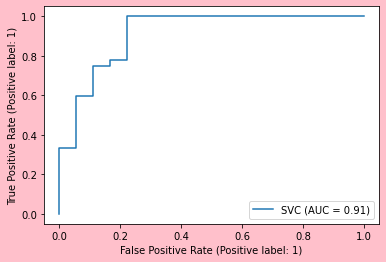

In [97]:
plot_roc_curve(svc_best,x_test4,y_test4)
plt.show()

# Model Saving

In [98]:
import pickle

In [99]:
svc_best_file='Loan_approval.pkl'
pickle.dump(svc_best,open(svc_best_file,'wb'))

# Conclusion

* I have choosed super vector classifier as my final model on the basis of its accuracy score, cv score, f1score ,presicion , recall and ROC curve score.
* our final model is giving accuracy score of 95.5 which is highest and best score among other models.
* There is leass difference between cross validation score and accuracy score for this model, it means the model is less underitting/overfitting compared to other models
* The ROC score is 0.91 which is also a good score.